<a href="https://colab.research.google.com/github/Bhuvanjeet/Image-Denoising-using-Autoencoder/blob/master/image_denoising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Image Denoising using Autoencoder**

**Fashion MNIST Dataset**

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255. The training and test data sets have 785 columns. The first column consists of the class labels (see above), and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

To locate a pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27. The pixel is located on row i and column j of a 28 x 28 matrix.

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from the top

Labels

Each training and test example is assigned to one of the following labels:

0: T-shirt/top
1: Trouser
2: Pullover
3: Dress
4: Coat
5: Sandal
6: Shirt
7: Sneaker
8: Bag
9: Ankle boot

Source: - https://www.kaggle.com/zalando-research/fashionmnist

**Project Overview:**

**1- Exploratory Data Analysis**

**2- Normalization and Addition of Noise**

**3- Convolutional Neural Network - CNN**

**4- Predictions and Conclusion**

**Exploratory Data Analysis - EDA**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

In [0]:
import tensorflow as tf

In [0]:
#loading dataset
(X_train,y_train) , (X_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [76]:
X_train.shape

(60000, 28, 28)

So, there are 60k images in X_train, each of 28x28 pixels.

In [77]:
y_train.shape

(60000,)

In [78]:
X_test.shape

(10000, 28, 28)

In [79]:
y_test.shape

(10000,)

**Data Visualization**

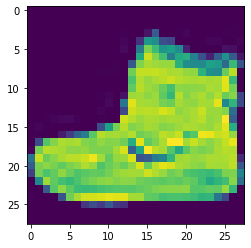

In [80]:
#Let's see the first image
plt.imshow(X_train[0])

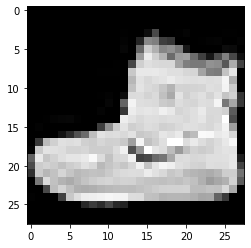

In [81]:
# images are in grayscale so:
plt.imshow(X_train[0],cmap='gray')

In [82]:
y_train[0]
# 9 is coming which represents ankle boot

9

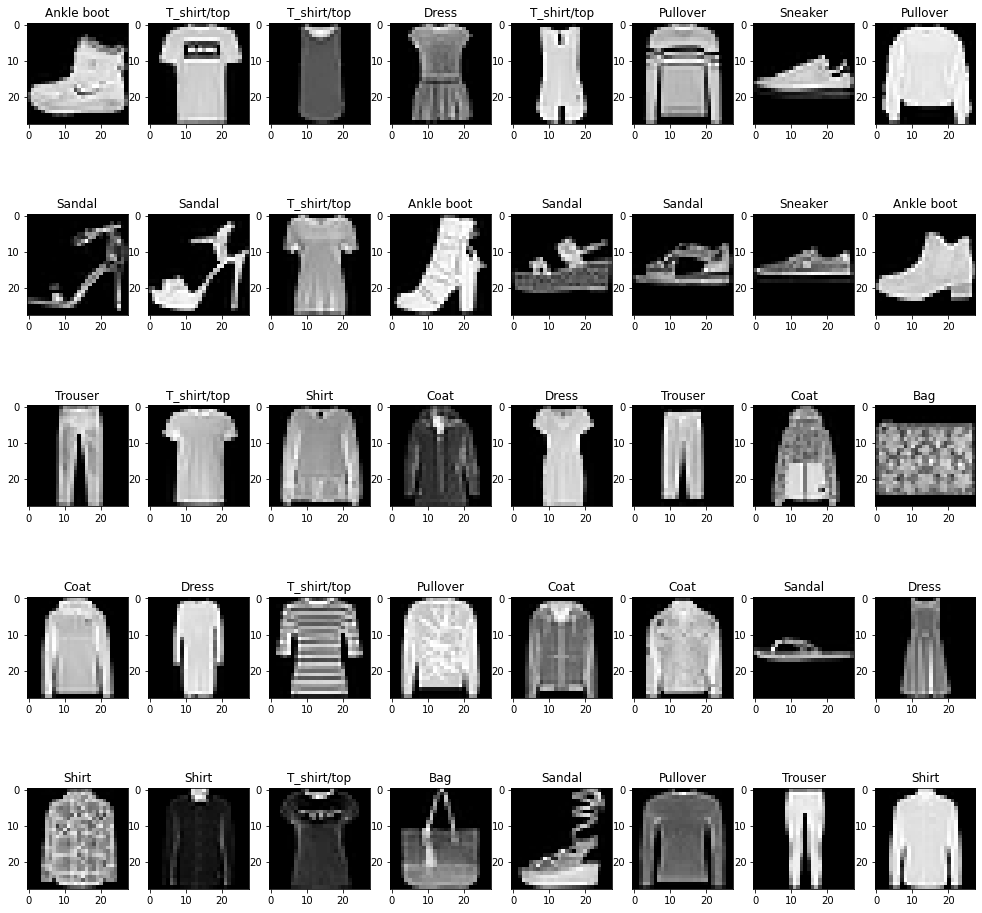

In [83]:
# let's visualize the first 40 images
feature_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(17, 17))
for i in range(40):     
    plt.subplot(5, 8, i + 1)
    plt.grid(False)
    plt.imshow(X_train[i],cmap='gray')
    index = y_train[i]
    plt.title(feature_names[index])
plt.show()

**Normalization and Addition of Noise**

Dataset is in an array format with each row representing one image.

Each array value is an integer between 0 and 255.

So, we will divide by 255 so that the range can be described with a 0.0-1.0 where 0.0 means 0 (0x00) and 1.0 means 255 (0xFF). 

Normalization will help to remove distortions caused by lights and shadows in an image.

In [0]:
# normalizing the data
X_train=X_train/255
X_test=X_test/255

In [85]:
X_train.shape

(60000, 28, 28)

In [86]:
X_test.shape

(10000, 28, 28)

Different types of noises can be added to the images. 

For example:

*Salt and Pepper Noise

*Gaussian Noise

*Periodic Noise

*Speckle Noise

Here, I am adding some random noise to each image.

In [0]:
#adding noise in training data
noise_fac = 0.3
noisy_data = []
for img in X_train:
  noisy_img=img + noise_fac*np.random.randn(*img.shape)  #noise_fac*np.random.randn(*img.shape) is a bunch of noise added to the original image
  noisy_img=np.clip(noisy_img,0,1)
  noisy_data.append(noisy_img)

In [0]:
noisy_data=np.array(noisy_data)

In [89]:
noisy_data.shape

(60000, 28, 28)

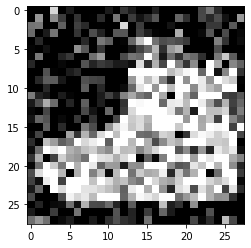

In [90]:
plt.imshow(noisy_data[0],cmap='gray')

In [0]:
#adding noise in test data
noise_fac = 0.3
noisy_test_data = []
for img in X_test:
  noisy_img=img + noise_fac*np.random.randn(*img.shape)  #noise_fac*np.random.randn(*img.shape) is a bunch of noise added to the original image
  noisy_img=np.clip(noisy_img,0,1)
  noisy_test_data.append(noisy_img)

In [0]:
noisy_test_data = np.array(noisy_test_data)

In [93]:
noisy_test_data.shape

(10000, 28, 28)

**Convolutional Neural Network - CNN**

We will be using Autoencoder to denoise images.

Autoencoders are a special type of neural network architectures in which the output is same as the input. Autoencoders are trained in an unsupervised manner in order to learn the exteremely low level repersentations of the input data. These low level features are then deformed back to project the actual data. An autoencoder is a regression task where the network is asked to predict its input (in other words, model the identity function). These networks has a tight bottleneck of a few neurons in the middle, forcing them to create effective representations that compress the input into a low-dimensional code that can be used by the decoder to reproduce the original input.

In this autoencoder network, we will add convolutional layers because convolutional networks works really well with the image inputs.





In [94]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Conv2DTranspose

In [0]:
#autoencoder
autoencoder=Sequential()
#encoder
autoencoder.add(Conv2D(filters=16,kernel_size=3,strides=2,padding='same',input_shape=(28,28,1)))
autoencoder.add(Conv2D(filters=8,kernel_size=3,strides=2,padding='same'))
autoencoder.add(Conv2D(filters=8,kernel_size=1,strides=1,padding='same'))
#decoder
autoencoder.add(Conv2DTranspose(filters=8,kernel_size=3,strides=2,padding='same'))
autoencoder.add(Conv2DTranspose(filters=1,kernel_size=3,strides=2,activation='sigmoid',padding='same'))

In [97]:
autoencoder.compile(loss='binary_crossentropy',optimizer='Adam')
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           72        
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_3 (Conv2DTr (None, 28, 28, 1)         73        
Total params: 2,049
Trainable params: 2,049
Non-trainable params: 0
_________________________________________________________________


In [0]:
#keras will automatically stop training the model based on a loss condition on 
#the validation data passed during the model.fit() call.
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=3)
#patience indicates the number of epochs to be done more after keras does early 
#stopping. This is done to ensure that the model is not affected 
#by some noise in the data.

In [99]:
autoencoder.fit(noisy_data.reshape(-1,28,28,1),X_train.reshape(-1,28,28,1),epochs=20,verbose=1,callbacks=[early_stop],validation_data=(noisy_test_data.reshape(-1,28,28,1),X_test.reshape(-1,28,28,1)))

Epoch 1/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3255 - val_loss: 0.3079
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3038 - val_loss: 0.3049
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3024 - val_loss: 0.3045
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3020 - val_loss: 0.3039
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3016 - val_loss: 0.3040
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3012 - val_loss: 0.3035
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3011 - val_loss: 0.3033
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - val_loss: 0.3030
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3010 - val_loss: 0.3033
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.300

In [100]:
autoencoder.history.history

{'loss': [0.3254871070384979,
  0.303775429725647,
  0.3024199306964874,
  0.30199503898620605,
  0.30155009031295776,
  0.30122461915016174,
  0.30108878016471863,
  0.3010076582431793,
  0.30095937848091125,
  0.30093541741371155,
  0.300890177488327,
  0.3008708953857422,
  0.30082815885543823,
  0.30082929134368896],
 'val_loss': [0.30786752700805664,
  0.304927796125412,
  0.3045429587364197,
  0.3039396107196808,
  0.3039878010749817,
  0.30347374081611633,
  0.3032711446285248,
  0.3030247390270233,
  0.30330830812454224,
  0.30305415391921997,
  0.3029913902282715,
  0.3029986619949341,
  0.30311766266822815,
  0.30325934290885925]}

In [0]:
loss_df=pd.DataFrame(autoencoder.history.history)

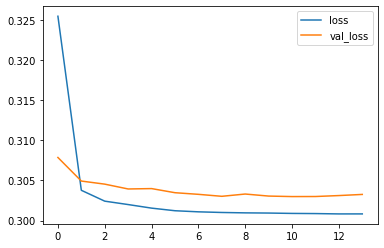

In [102]:
loss_df.plot()

**Predictions and Conclusion**

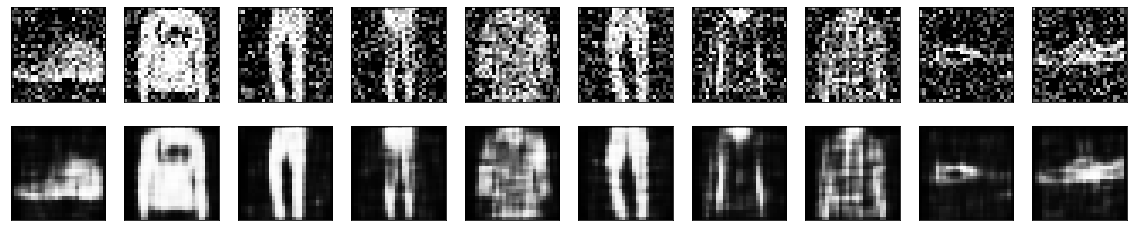

In [104]:
# displaying first 10 noised and denoised images
fig , axes = plt.subplots(nrows=2 , ncols=10, sharex=True,sharey=True, figsize=(20,4))
for images , row in zip([noisy_test_data[:10],predictions_autoencoder],axes):
  for img , ax in zip (images,row):
    ax.imshow(img.reshape((28,28)), cmap='Greys_r')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

In this way, noise is removed from the images using autoencoder.